In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


# EDA Script to find patterns in delays, cancellations, or any contributing factors to delays

### Business Question: How can we enhance operational efficiency by identifying patterns in delays, cancellations, or specific contributing factors?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
airline_df = pd.read_csv("../dataset/airline.csv")
airline_df.head()

,ActualElapsedTime,AirTime,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,CarrierDelay,...,Month,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Year
0,154.0,122.0,90.0,1850.0,1720,1455,145.0,NaN,0,0.0,...,6,23.0,ORD,0.0,N293AA,8.0,24.0,AA,0.0,2006
1,159.0,125.0,59.0,1703.0,1604,1510,114.0,NaN,0,NaN,...,9,NaN,DTW,NaN,N8921E,19.0,15.0,NW,NaN,1997
2,NaN,71.0,NaN,NaN,1140,1037,63.0,NaN,1,NaN,...,2,NaN,CVG,NaN,N331DL,4.0,15.0,DL,NaN,1995
3,70.0,NaN,80.0,20.0,2300,2100,60.0,NaN,0,NaN,...,2,NaN,MDW,NaN,NaN,NaN,NaN,ML (1),NaN,1991
4,150.0,135.0,5.0,2030.0,2025,1740,165.0,NaN,0,NaN,...,2,NaN,PHL,NaN,N512AU,3.0,12.0,US,NaN,1997


In [3]:
airline_df["Distance"] = airline_df["Distance"] * 1.60934
airline_df.head()

,ActualElapsedTime,AirTime,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,CarrierDelay,...,Month,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Year
0,154.0,122.0,90.0,1850.0,1720,1455,145.0,NaN,0,0.0,...,6,23.0,ORD,0.0,N293AA,8.0,24.0,AA,0.0,2006
1,159.0,125.0,59.0,1703.0,1604,1510,114.0,NaN,0,NaN,...,9,NaN,DTW,NaN,N8921E,19.0,15.0,NW,NaN,1997
2,NaN,71.0,NaN,NaN,1140,1037,63.0,NaN,1,NaN,...,2,NaN,CVG,NaN,N331DL,4.0,15.0,DL,NaN,1995
3,70.0,NaN,80.0,20.0,2300,2100,60.0,NaN,0,NaN,...,2,NaN,MDW,NaN,NaN,NaN,NaN,ML (1),NaN,1991
4,150.0,135.0,5.0,2030.0,2025,1740,165.0,NaN,0,NaN,...,2,NaN,PHL,NaN,N512AU,3.0,12.0,US,NaN,1997


### Separating into cancelled flights and normal flights that were not affected by cancellations

In [4]:
num_cancelled_flights = airline_df[airline_df['Cancelled'] == 1].shape[0]
total_flights = airline_df.shape[0]
proportion_cancelled = round(num_cancelled_flights / total_flights, 5)

In [5]:
print (f"Percentage of cancelled flights({num_cancelled_flights}): {proportion_cancelled * 100}% from a total of {total_flights} flights")

Percentage of cancelled flights(184011): 1.862% from a total of 9882798 flights


In [6]:
cancelled_flights = airline_df[airline_df['Cancelled'] == 1]
cancelled_flights.head()

,ActualElapsedTime,AirTime,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,CarrierDelay,...,Month,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Year
2,NaN,71.0,NaN,NaN,1140,1037,63.0,NaN,1,NaN,...,2,NaN,CVG,NaN,N331DL,4.0,15.0,DL,NaN,1995
32,NaN,NaN,NaN,NaN,1325,1325,60.0,NaN,1,NaN,...,2,NaN,DTW,NaN,NaN,NaN,NaN,WN,NaN,1988
51,NaN,NaN,NaN,NaN,2019,1810,69.0,NaN,1,NaN,...,5,NaN,BNA,NaN,N604DL,0.0,0.0,DL,NaN,1998
73,NaN,NaN,NaN,NaN,1748,1544,124.0,C,1,0.0,...,5,0.0,IAH,0.0,0,0.0,0.0,XE,0.0,2006
188,NaN,NaN,NaN,NaN,1622,1510,72.0,NaN,1,NaN,...,6,NaN,LGB,NaN,N901AW,0.0,0.0,HP,NaN,1996


## Analysis of all cancelled flights

In [7]:
cancelled_flights.shape

(184011, 29)

In [8]:
cancelled_flights.columns

Index(['ActualElapsedTime', 'AirTime', 'ArrDelay', 'ArrTime', 'CRSArrTime',
       'CRSDepTime', 'CRSElapsedTime', 'CancellationCode', 'Cancelled',
       'CarrierDelay', 'DayOfWeek', 'DayofMonth', 'DepDelay', 'DepTime',
       'Dest', 'Distance', 'Diverted', 'FlightNum', 'LateAircraftDelay',
       'Month', 'NASDelay', 'Origin', 'SecurityDelay', 'TailNum', 'TaxiIn',
       'TaxiOut', 'UniqueCarrier', 'WeatherDelay', 'Year'],
      dtype='object')

In [9]:
""" 
['ActualElapsedTime', 'AirTime', 'ArrDelay', 'ArrTime', 'CRSArrTime',
       'CRSDepTime', 'CRSElapsedTime', 'CancellationCode', 'Cancelled',
       'CarrierDelay', 'DayOfWeek', 'DayofMonth', 'DepDelay', 'DepTime',
       'Dest', 'Distance', 'Diverted', 'FlightNum', 'LateAircraftDelay',
       'Month', 'NASDelay', 'Origin', 'SecurityDelay', 'TailNum', 'TaxiIn',
       'TaxiOut', 'UniqueCarrier', 'WeatherDelay', 'Year']
"""

cancelled_flights = cancelled_flights.drop([
    "ActualElapsedTime",
    "AirTime",
    "ArrDelay", 
    "ArrTime", 
    "CRSArrTime", 
    "CRSDepTime", 
    "CRSElapsedTime", 
    "DepTime", 
    "Diverted"
], axis=1)

cancelled_flights_with_cancellationCode = cancelled_flights.dropna(subset=["CancellationCode"])

cancelled_flights_with_cancellationCode.head()

,CancellationCode,Cancelled,CarrierDelay,DayOfWeek,DayofMonth,DepDelay,Dest,Distance,FlightNum,LateAircraftDelay,Month,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Year
73,C,1,0.0,1,29,NaN,BNA,1057.33638,2767,0.0,5,0.0,IAH,0.0,0,0.0,0.0,XE,0.0,2006
242,A,1,0.0,4,24,NaN,DCA,365.32018,1620,0.0,2,0.0,RDU,0.0,0,0.0,0.0,US,0.0,2005
295,A,1,NaN,6,10,NaN,LAX,2808.29830,67,NaN,5,NaN,ORD,NaN,NaN,NaN,NaN,UA,NaN,2008
336,C,1,0.0,6,14,NaN,MCO,1372.76702,786,0.0,8,0.0,IAH,0.0,0,0.0,0.0,CO,0.0,2004
727,A,1,0.0,5,2,NaN,DEN,115.87248,906,0.0,1,0.0,COS,0.0,000000,0.0,0.0,UA,0.0,2004


In [10]:
cancelled_flights_with_cancellationCode.to_csv("../dataset/cancelled_flights_with_cancellationCode.csv")

In [11]:
cancelled_flights_with_cancellationCode.shape[0]

58603

In [12]:
cancelled_flights_with_cancellationCode['CancellationCode'].value_counts()

CancellationCode
A    25291
B    21428
C    11845
D       39
Name: count, dtype: int64

### Reasons for cancellation
- the first year in which there were cancellation codes was starting from <b> 2003 </b>

In [13]:
print ("Proportion of flights cancelled due to Carrier issues starting from 2003 with Cancellation Code: " + str(round(cancelled_flights_with_cancellationCode["CancellationCode"].value_counts()["A"] / cancelled_flights_with_cancellationCode.shape[0] * 100, 5)) + "%")
print ("Proportion of flights cancelled due to Weather issues starting from 2003 with Cancellation Code: " + str(round(cancelled_flights_with_cancellationCode["CancellationCode"].value_counts()["B"] / cancelled_flights_with_cancellationCode.shape[0] * 100, 5)) + "%")
print ("Proportion of flights cancelled due to NAS issues starting from 2003 with Cancellation Code: " + str(round(cancelled_flights_with_cancellationCode["CancellationCode"].value_counts()["C"] / cancelled_flights_with_cancellationCode.shape[0] * 100, 5)) + "%")
print ("Proportion of flights cancelled due to Security issues starting from 2003 with Cancellation Code: " + str(round(cancelled_flights_with_cancellationCode["CancellationCode"].value_counts()["D"] / cancelled_flights_with_cancellationCode.shape[0] * 100, 5)) + "%")

Proportion of flights cancelled due to Carrier issues starting from 2003 with Cancellation Code: 43.15649%
Proportion of flights cancelled due to Weather issues starting from 2003 with Cancellation Code: 36.56468%
Proportion of flights cancelled due to NAS issues starting from 2003 with Cancellation Code: 20.21228%
Proportion of flights cancelled due to Security issues starting from 2003 with Cancellation Code: 0.06655%


In [30]:
print ("Proportion of flights cancelled due to Carrier issues from all cancelled flights: " + str(round(cancelled_flights_with_cancellationCode["CancellationCode"].value_counts()["A"] / cancelled_flights.shape[0] * 100, 5)) + "%")
print ("Proportion of flights cancelled due to Weather issues from all cancelled flights: " + str(round(cancelled_flights_with_cancellationCode["CancellationCode"].value_counts()["B"] / cancelled_flights.shape[0] * 100, 5)) + "%")
print ("Proportion of flights cancelled due to NAS issues from all cancelled flights: " + str(round(cancelled_flights_with_cancellationCode["CancellationCode"].value_counts()["C"] / cancelled_flights.shape[0] * 100, 5)) + "%")
print ("Proportion of flights cancelled due to Security issues from all cancelled flights: " + str(round(cancelled_flights_with_cancellationCode["CancellationCode"].value_counts()["D"] / cancelled_flights.shape[0] * 100, 5)) + "%")

Proportion of flights cancelled due to Carrier issues from all cancelled flights: 13.74429%
Proportion of flights cancelled due to Weather issues from all cancelled flights: 11.64496%
Proportion of flights cancelled due to NAS issues from all cancelled flights: 6.43712%
Proportion of flights cancelled due to Security issues from all cancelled flights: 0.02119%


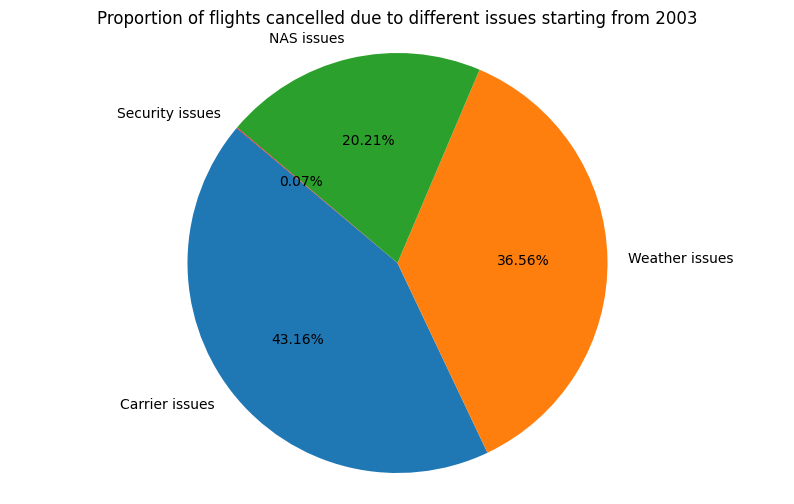

In [28]:
proportions = [
    round(cancelled_flights_with_cancellationCode["CancellationCode"].value_counts()["A"] / cancelled_flights_with_cancellationCode.shape[0] * 100, 5),
    round(cancelled_flights_with_cancellationCode["CancellationCode"].value_counts()["B"] / cancelled_flights_with_cancellationCode.shape[0] * 100, 5),
    round(cancelled_flights_with_cancellationCode["CancellationCode"].value_counts()["C"] / cancelled_flights_with_cancellationCode.shape[0] * 100, 5),
    round(cancelled_flights_with_cancellationCode["CancellationCode"].value_counts()["D"] / cancelled_flights_with_cancellationCode.shape[0] * 100, 5)
]
labels = ['Carrier issues', 'Weather issues', 'NAS issues', 'Security issues']

plt.figure(figsize=(10, 6))
plt.pie(proportions, labels=labels, autopct='%1.2f%%', startangle=140)

plt.axis('equal')
plt.title('Proportion of flights cancelled due to different issues starting from 2003')
plt.show()

In [14]:
cancelled_flights_with_cancellationCode["Year"].value_counts().sort_index()

Year
2003     4249
2004    10072
2005    10715
2006     9726
2007    12882
2008    10959
Name: count, dtype: int64

In [15]:
first_year_with_cancellationCode = cancelled_flights_with_cancellationCode["Year"].min()
first_year_with_cancellationCode

2003

In [16]:
print ("Proportion of well documented cancelled flights: " + str(round(cancelled_flights_with_cancellationCode.shape[0] / cancelled_flights.shape[0] * 100, 5)) + "%")

Proportion of well documented cancelled flights: 31.84755%


In [17]:
cancelled_flights_without_cancellationCode = cancelled_flights[cancelled_flights["CancellationCode"].isna()]
cancelled_flights_without_cancellationCode.head()

,CancellationCode,Cancelled,CarrierDelay,DayOfWeek,DayofMonth,DepDelay,Dest,Distance,FlightNum,LateAircraftDelay,Month,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Year
2,NaN,1,NaN,7,5,NaN,GRR,431.30312,1610,NaN,2,NaN,CVG,NaN,N331DL,4.0,15.0,DL,NaN,1995
32,NaN,1,NaN,2,9,NaN,MDW,368.53886,725,NaN,2,NaN,DTW,NaN,NaN,NaN,NaN,WN,NaN,1988
51,NaN,1,NaN,6,16,NaN,ATL,344.39876,580,NaN,5,NaN,BNA,NaN,N604DL,0.0,0.0,DL,NaN,1998
188,NaN,1,NaN,3,26,NaN,PHX,571.31570,2406,NaN,6,NaN,LGB,NaN,N901AW,0.0,0.0,HP,NaN,1996
310,NaN,1,NaN,3,3,NaN,IAH,904.44908,1215,NaN,6,NaN,BHM,NaN,UNKNOW,0.0,0.0,CO,NaN,1998


In [20]:
last_year_without_cancellationCode = cancelled_flights_without_cancellationCode["Year"].max()
last_year_without_cancellationCode

2003

### Analysing the data with Cancellation Code

In [25]:
columns_of_interest = ['UniqueCarrier', 'DayOfWeek', 'DayofMonth', 'Distance', 'Dest', 'Origin', 'Month', 'Year']

In [23]:
cancellation_codes = ['A', 'B', 'C', 'D']

### Analysing the data without Cancellation Code

In [21]:
cancelled_flights_without_cancellationCode["Year"].value_counts().sort_index()

Year
1987     1593
1988     3892
1989     5918
1990     4209
1991     3420
1992     4264
1993     4850
1994     5315
1995     7392
1996    10190
1997     7858
1998    11334
1999    12360
2000    15036
2001    18661
2002     5198
2003     3918
Name: count, dtype: int64

In [25]:
cancelled_flights_without_cancellationCode["DepDelay"].isna().sum()

125408

In [18]:
cancelled_flights_without_cancellationCode.to_csv("../dataset/cancelled_flights_without_cancellationCode.csv")

### Seeing proportion of flights that are cancelled if they are long-haul or not
- Condition: long-haul flights: >=3000km

<b> Ans: </b> 
1. Based on the results below, it shows that the avg distance of cancelled flights is 977.63km.
2. More than 75% of flights cancelled are considered short-haul as the 75th percentile of flights cancelled has a distance of 1266.55km

In [23]:
cancelled_flights["Distance"].isnull().sum()

162

In [55]:
cancelled_flights["Distance"].describe()

count    183849.000000
mean        977.628133
std         776.148423
min          17.702740
25%         424.865760
50%         740.296400
75%        1266.550580
max        7985.545080
Name: Distance, dtype: float64

### Seeing what is airline is the one that results in the most number of cancellations

<b> Breaking them down into: </b>
- which year
- destination of flight
- if there is a cancellation code, provide the cancellation code as well

In [59]:
cancelled_flights["UniqueCarrier"].value_counts()

UniqueCarrier
US        23250
UA        23234
AA        22778
DL        20678
NW        17130
MQ        12641
WN        12335
CO         9173
TW         5357
OO         5107
AS         4602
HP         4448
XE         4214
OH         3844
EV         3831
YV         2405
EA         2331
DH         1716
9E         1208
FL         1008
B6          750
PI          674
PA (1)      291
AQ          222
TZ          191
F9          131
ML (1)      114
HA          108
PS           78
Name: count, dtype: int64

In [31]:
cancelled_flights["Origin"].value_counts()

Origin
ORD    15818
ATL     8555
DFW     8345
LGA     6638
EWR     6498
       ...  
LWS        1
KSM        1
EAU        1
MKK        1
MAZ        1
Name: count, Length: 325, dtype: int64

### Quick analysis of only the carrier resulting in the most cancellations (Code: US)
- Carrier issues account for the most cancellations still amongst the 4 factors given
- The top 5 airports that have the most cancellations are:
    1. Charlotte Douglas International Airport
    2. Philadelphia International Airport
    3. Pittsburgh International Airport
    4. Boston Logan International Airport
    5. LaGuardia Airport

In [61]:
us_flights = cancelled_flights[cancelled_flights["UniqueCarrier"] == "US"]
us_flights.shape[0]

23250

In [62]:
us_flights["CancellationCode"].value_counts()

CancellationCode
A    1742
C     709
B     671
D       1
Name: count, dtype: int64

In [63]:
print ("Proportion of US flights cancelled due to Carrier issues: " + str(round(us_flights["CancellationCode"].value_counts()["A"] / us_flights.shape[0] * 100, 5)) + "%")
print ("Proportion of US flights cancelled due to Weather issues: " + str(round(us_flights["CancellationCode"].value_counts()["B"] / us_flights.shape[0] * 100, 5)) + "%")
print ("Proportion of US flights cancelled due to NAS issues: " + str(round(us_flights["CancellationCode"].value_counts()["C"] / us_flights.shape[0] * 100, 5)) + "%")
print ("Proportion of US flights cancelled due to Security issues: " + str(round(us_flights["CancellationCode"].value_counts()["D"] / us_flights.shape[0] * 100, 5)) + "%")

Proportion of US flights cancelled due to Carrier issues: 7.49247%
Proportion of US flights cancelled due to Weather issues: 2.88602%
Proportion of US flights cancelled due to NAS issues: 3.04946%
Proportion of US flights cancelled due to Security issues: 0.0043%


In [66]:
us_flights["Year"].value_counts()

Year
1999    2592
2001    2497
2000    2247
1994    1576
1996    1571
1992    1502
1998    1343
1993    1164
1995    1117
1989    1006
1997    1001
1990     897
2007     710
2005     633
2008     540
2004     533
2003     519
1991     518
2002     445
2006     424
1988     366
1987      49
Name: count, dtype: int64

In [72]:
origin_counter = us_flights["Origin"].value_counts()
origin_counter

Origin
CLT    2672
PHL    2448
PIT    2445
BOS    1690
LGA    1416
       ... 
BGR       1
EYW       1
DSM       1
YKM       1
BOI       1
Name: count, Length: 149, dtype: int64

In [73]:
dest_counter = us_flights["Dest"].value_counts()
dest_counter

Dest
CLT    3007
PIT    2769
PHL    2416
BOS    1623
LGA    1377
       ... 
ACY       1
LWB       1
HNL       1
GEG       1
TTN       1
Name: count, Length: 149, dtype: int64

In [79]:
total_counter = origin_counter.add(dest_counter, fill_value=0).filter(items=origin_counter.index, axis=0)
avg_counter = total_counter / 2
avg_counter

CLT    2839.5
PHL    2432.0
PIT    2607.0
BOS    1656.5
LGA    1396.5
        ...  
BGR       0.5
EYW       1.5
DSM       1.5
YKM       0.5
BOI       0.5
Name: count, Length: 149, dtype: float64

In [11]:
cancelled_flights.to_csv("../dataset/cancelled_flights.csv")

## Analysis of flights without cancellations

In [83]:
normal_flights = airline_df[airline_df['Cancelled'] == 0]
normal_flights.head()

,ActualElapsedTime,AirTime,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,CarrierDelay,...,Month,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Year
0,154.0,122.0,90.0,1850.0,1720,1455,145.0,NaN,0,0.0,...,6,23.0,ORD,0.0,N293AA,8.0,24.0,AA,0.0,2006
1,159.0,125.0,59.0,1703.0,1604,1510,114.0,NaN,0,NaN,...,9,NaN,DTW,NaN,N8921E,19.0,15.0,NW,NaN,1997
3,70.0,NaN,80.0,20.0,2300,2100,60.0,NaN,0,NaN,...,2,NaN,MDW,NaN,NaN,NaN,NaN,ML (1),NaN,1991
4,150.0,135.0,5.0,2030.0,2025,1740,165.0,NaN,0,NaN,...,2,NaN,PHL,NaN,N512AU,3.0,12.0,US,NaN,1997
5,110.0,NaN,10.0,1450.0,1440,1300,100.0,NaN,0,NaN,...,2,NaN,BDL,NaN,NaN,NaN,NaN,CO,NaN,1989


In [84]:
""" 
['ActualElapsedTime', 'AirTime', 'ArrDelay', 'ArrTime', 'CRSArrTime',
       'CRSDepTime', 'CRSElapsedTime', 'CancellationCode', 'Cancelled',
       'CarrierDelay', 'DayOfWeek', 'DayofMonth', 'DepDelay', 'DepTime',
       'Dest', 'Distance', 'Diverted', 'FlightNum', 'LateAircraftDelay',
       'Month', 'NASDelay', 'Origin', 'SecurityDelay', 'TailNum', 'TaxiIn',
       'TaxiOut', 'UniqueCarrier', 'WeatherDelay', 'Year']
"""

normal_flights = normal_flights.drop([
    "CancellationCode",
    "Cancelled"
], axis=1)

normal_flights.to_csv("../dataset/flights_without_cancellation_data.csv")

2684691

In [85]:
normal_flights.head()

,ActualElapsedTime,AirTime,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CarrierDelay,DayOfWeek,DayofMonth,...,Month,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Year
0,154.0,122.0,90.0,1850.0,1720,1455,145.0,0.0,3,21,...,6,23.0,ORD,0.0,N293AA,8.0,24.0,AA,0.0,2006
1,159.0,125.0,59.0,1703.0,1604,1510,114.0,NaN,2,16,...,9,NaN,DTW,NaN,N8921E,19.0,15.0,NW,NaN,1997
3,70.0,NaN,80.0,20.0,2300,2100,60.0,NaN,2,5,...,2,NaN,MDW,NaN,NaN,NaN,NaN,ML (1),NaN,1991
4,150.0,135.0,5.0,2030.0,2025,1740,165.0,NaN,6,1,...,2,NaN,PHL,NaN,N512AU,3.0,12.0,US,NaN,1997
5,110.0,NaN,10.0,1450.0,1440,1300,100.0,NaN,2,21,...,2,NaN,BDL,NaN,NaN,NaN,NaN,CO,NaN,1989


In [86]:
normal_flights.shape

(9698787, 27)

### Things to take note:
1. ArrDelay = ActualElapsedTime - CSRElapsedTime + DepDelay (Actual Flight Time - Scheduled Flight Time + Delays during departure)
2. ArrDelay = CarrierDelay + LateAircraftDelay + NASDelay + SecurityDelay + WeatherDelay
3. ArrDelay = ArrDelay - CSRArrTime

Factors resulting in arrival delay:
- carrier delay
- late aircraft delay
- nas delay
- security delay
- weather delay

In [87]:
normal_flights_with_no_missing_values = normal_flights.dropna(subset=["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"])
normal_flights_with_no_missing_values.shape

(2690088, 27)

In [88]:
print (f"Percentage of flights without delay information: {round((1 - normal_flights_with_no_missing_values.shape[0] / normal_flights.shape[0]) * 100, 2)}%")

Percentage of flights without delay information: 72.26%


In [89]:
print (f"Percentage of flights with delay information: {round(normal_flights_with_no_missing_values.shape[0] / normal_flights.shape[0] * 100, 2)}%")

Percentage of flights with delay information: 27.74%


### Seeing distribution of delay times for each factor

In [90]:
delay_factors = ["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]

In [91]:
melted_flights = pd.melt(normal_flights_with_no_missing_values, id_vars=["ArrDelay"], value_vars=delay_factors, var_name="DelayType", value_name="DelayDuration")

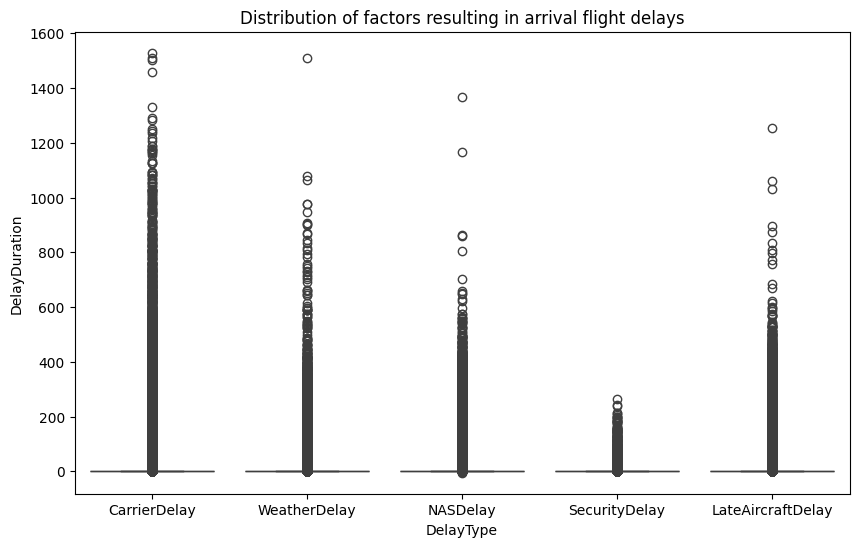

In [92]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_flights, x="DelayType", y="DelayDuration")
plt.title("Distribution of factors resulting in arrival flight delays")
plt.show()

In [93]:
average_arrival_delay_per_carrier = normal_flights_with_no_missing_values.groupby("UniqueCarrier")["ArrDelay"].mean()

count    9.676146e+06
mean     7.050883e+00
std      3.074553e+01
min     -1.252000e+03
25%     -7.000000e+00
50%      0.000000e+00
75%      1.100000e+01
max      1.622000e+03
Name: ArrDelay, dtype: float64